<a href="https://colab.research.google.com/github/bijivemulakeerthi/Weather-Forecasting/blob/main/temperature_pred22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


dataset1 = pd.read_csv('/content/weather.csv')
dataset1

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9


In [2]:
dataset1.columns

Index(['date', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m�)',
       'PAR (�mol/m�/s)', 'max. PAR (�mol/m�/s)', 'Tlog (degC)', 'OT'],
      dtype='object')

# Data Preprocessing

**Convert 'date' column to datetime format and set it as the index**


In [3]:
dataset1['date'] = pd.to_datetime(dataset1['date'], errors='coerce')
dataset1.set_index('date', inplace=True)

**Check for missing values**

In [4]:
dataset1.isnull().sum()

,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0
H2OC (mmol/mol),0


**Renaming columns to remove special characters for easier access**

In [5]:
# Renaming columns to remove special characters for easier access (optional)
dataset1.columns = dataset1.columns.str.replace('[^A-Za-z0-9 ]+', '', regex=True)

**Rename the Columns**

In [6]:
# Ensuring all special characters and spaces are removed
dataset1.columns = dataset1.columns.str.replace(r'[^\w\s]', '', regex=True)
dataset1.columns = dataset1.columns.str.replace(' ', '_')  # Replacing spaces with underscores
print(dataset1.columns)  # Confirming the new names


Index(['p_mbar', 'T_degC', 'Tpot_K', 'Tdew_degC', 'rh_', 'VPmax_mbar',
       'VPact_mbar', 'VPdef_mbar', 'sh_gkg', 'H2OC_mmolmol', 'rho_gm3',
       'wv_ms', 'max_wv_ms', 'wd_deg', 'rain_mm', 'raining_s', 'SWDR_Wm',
       'PAR_molms', 'max_PAR_molms', 'Tlog_degC', 'OT'],
      dtype='object')


# Exploratory Data Analysis (EDA)

Descriptive Statistics

In [7]:
dataset1.describe()

,p_mbar,T_degC,Tpot_K,Tdew_degC,rh_,VPmax_mbar,VPact_mbar,VPdef_mbar,sh_gkg,H2OC_mmolmol,...,wv_ms,max_wv_ms,wd_deg,rain_mm,raining_s,SWDR_Wm,PAR_molms,max_PAR_molms,Tlog_degC,OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


**Distribution Plots**

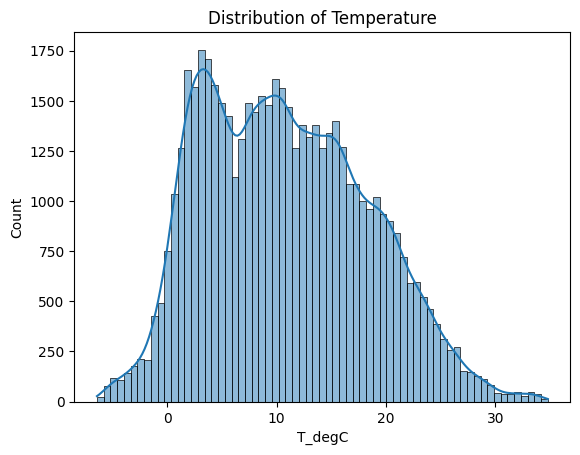

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(dataset1['T_degC'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

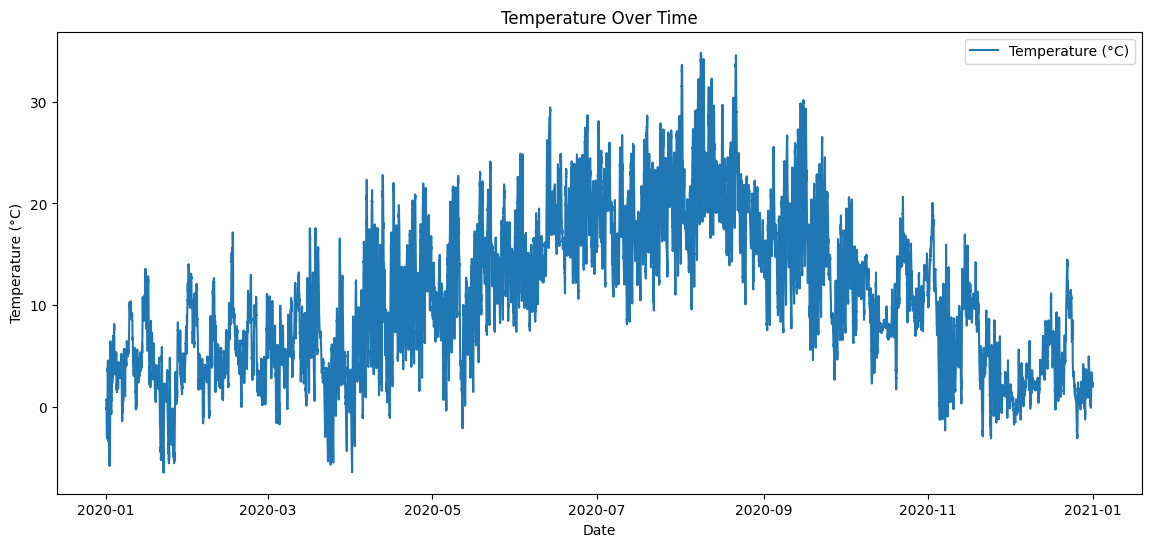

In [ ]:
import matplotlib.pyplot as plt

# Plotting the temperature over time
plt.figure(figsize=(14, 6))
plt.plot(dataset1.index, dataset1['T_degC'], label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()


**Feature Selection based on Correlation**

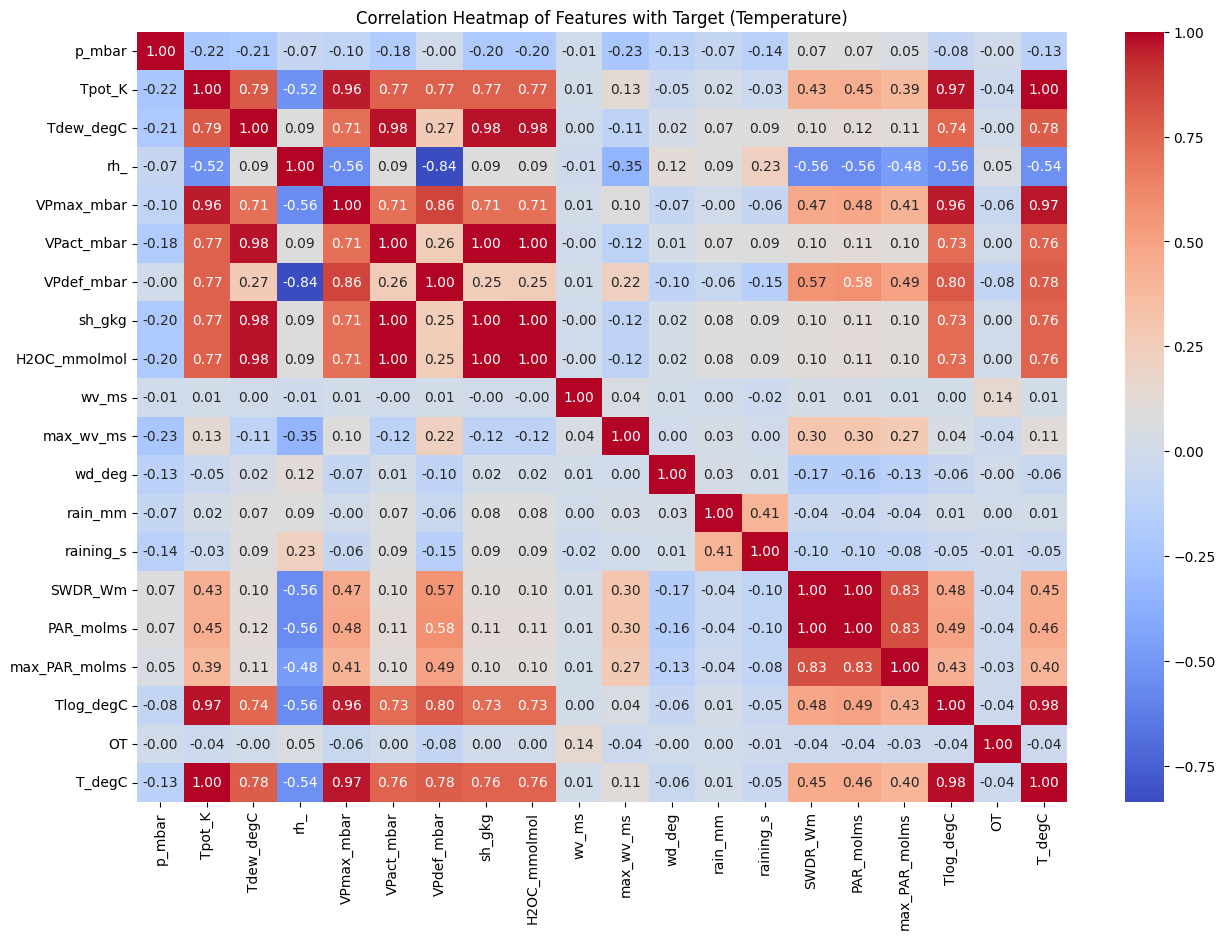

Correlation of each feature with the target variable (Temperature):

Tpot_K           0.995228
Tlog_degC        0.981562
VPmax_mbar       0.967901
Tdew_degC        0.782740
VPdef_mbar       0.779616
VPact_mbar       0.762860
H2OC_mmolmol     0.761934
sh_gkg           0.761550
PAR_molms        0.459806
SWDR_Wm          0.448607
max_PAR_molms    0.399064
max_wv_ms        0.109162
rain_mm          0.008448
wv_ms            0.007514
OT              -0.039150
raining_s       -0.048777
wd_deg          -0.061356
p_mbar          -0.127305
rh_             -0.540784
Name: T_degC, dtype: float64

Selected features based on correlation threshold: ['Tpot_K', 'Tlog_degC', 'VPmax_mbar', 'Tdew_degC', 'VPdef_mbar', 'VPact_mbar', 'H2OC_mmolmol', 'sh_gkg', 'rh_']


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updating the feature and target column names
features = dataset1[['p_mbar', 'Tpot_K', 'Tdew_degC', 'rh_', 'VPmax_mbar',
                     'VPact_mbar', 'VPdef_mbar', 'sh_gkg', 'H2OC_mmolmol',
                     'wv_ms', 'max_wv_ms', 'wd_deg', 'rain_mm', 'raining_s',
                     'SWDR_Wm', 'PAR_molms', 'max_PAR_molms', 'Tlog_degC', 'OT']]
target = dataset1['T_degC']

# Adding target variable to features for correlation calculation
correlation_matrix = features.copy()
correlation_matrix['T_degC'] = target

# Computing correlation matrix
corr = correlation_matrix.corr()

# Plotting heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features with Target (Temperature)")
plt.show()

# Extracting correlations with the target variable
target_corr = corr['T_degC'].drop('T_degC').sort_values(ascending=False)
print("Correlation of each feature with the target variable (Temperature):\n")
print(target_corr)

# Selecting features with high correlation (absolute value > threshold)
threshold = 0.5  # Defining a correlation threshold
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
print("\nSelected features based on correlation threshold:", selected_features)


**Selecting Features and Target Variable**

In [10]:
# Converting column names in the dataset to lowercase for consistency
dataset1.columns = [col.lower() for col in dataset1.columns]

# Printing the updated column names to verify
print("Updated column names in the dataset:")
print(dataset1.columns.tolist())

# Selecting features based on correlation analysis with corrected names
selected_features = ['Tpot_K', 'Tlog_degC', 'VPmax_mbar',
                     'Tdew_degC', 'VPdef_mbar', 'VPact_mbar',
                     'H2OC_mmolmol', 'rh_', 'sh_gkg']
# Printing selected features
print("Selected features:", selected_features)

# Ensuring all selected features are present in the dataset
selected_features = [feature for feature in selected_features if feature in dataset1.columns]

# Checking if selected_features is empty and handle accordingly
if not selected_features:
    raise ValueError("No selected features found in the dataset. Check for typos or case sensitivity issues.")

# Printing the selected features
print("Final selected features:", selected_features)

# Defining X and y based on the selected features
X = dataset1[selected_features]  # Features selected from the dataset

y = dataset1['t_degc']  # Ensuring that the target variable name is correct, in lowercase

Updated column names in the dataset:
['p_mbar', 't_degc', 'tpot_k', 'tdew_degc', 'rh_', 'vpmax_mbar', 'vpact_mbar', 'vpdef_mbar', 'sh_gkg', 'h2oc_mmolmol', 'rho_gm3', 'wv_ms', 'max_wv_ms', 'wd_deg', 'rain_mm', 'raining_s', 'swdr_wm', 'par_molms', 'max_par_molms', 'tlog_degc', 'ot']
Selected features: ['Tpot_K', 'Tlog_degC', 'VPmax_mbar', 'Tdew_degC', 'VPdef_mbar', 'VPact_mbar', 'H2OC_mmolmol', 'rh_', 'sh_gkg']
Final selected features: ['rh_', 'sh_gkg']


**Splitting the Data into Training and Testing Sets**

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building Models**


*   Initialize models
*   Train, predict, and evaluate each model



Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Calculating evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing evaluation metrics for Random Forest
print(f"Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")

# Feature Importance for Random Forest
feature_importances_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance for Random Forest:")
print(feature_importances_rf)


Random Forest Performance:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R^2 Score: 1.00

Feature Importance for Random Forest:
  Feature  Importance
1  sh_gkg    0.687033
0     rh_    0.312967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing Linear Regression model
lr_model = LinearRegression()

# Training the Linear Regression model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Calculating evaluation metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# Printing evaluation metrics for Linear Regression
print(f"Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 1.19
Mean Squared Error (MSE): 2.69
Root Mean Squared Error (RMSE): 1.64
R^2 Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Gradient Boosting Regressor**

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Training the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Making predictions
y_pred_gb = gb_model.predict(X_test)

# Calculating evaluation metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Printing evaluation metrics for Gradient Boosting
print(f"Gradient Boosting Performance:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R^2 Score: {r2_gb:.2f}")

Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R^2 Score: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
